In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

import pandas as pd
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Remueva este comentario si es necesario: 
# !pip install pyLDAvis

In [10]:
url = 'https://raw.githubusercontent.com/JuventinoLVH/principales_temas_de_interes_nacional/main/datos/articulos.json'

df_articulos = pd.read_json(url,orient='record')
print(df_articulos)

                                                 Título       Fecha  \
0     Protección de cenotes, ríos subterráneos y cue...  15.05.2023   
1     Maestras y maestros recibirán aumento salarial...  15.05.2023   
2     Palabras de presidente Andrés Manuel López Obr...  15.05.2023   
3     Presidente constata operación y reforzamiento ...  15.05.2023   
4     “¡La soberanía energética va!”, afirma preside...  15.05.2023   
...                                                 ...         ...   
3194  Presidente Andrés Manuel López Obrador encabez...  04.12.2018   
3195  Discurso del presidente Andrés Manuel López Ob...  04.12.2018   
3196  Ceremonia de entrega del Bastón de Mando y Pri...  04.12.2018   
3197  El Estado se ocupará de disminuir las desigual...  04.12.2018   
3198  Andrés Manuel López Obrador rinde protesta com...  04.12.2018   

                                              Contenido  
0        Al\nencabezar el informe semanal del Tren M...  
1        El\npresidente Andrés 

In [12]:
import unicodedata

entidades = ['Ciudad de México', 'Estado de México', 'Aguascalientes', 
             'Baja California', 'Baja California Sur', 'Campeche', 
             'Chiapas', 'Chihuahua', 'Coahuila', 
             'Colima', 'Durango', 'Guanajuato', 
             'Guerrero', 'Hidalgo', 'Jalisco', 
             'Michoacán', 'Morelos', 'Nayarit', 
             'Nuevo León', 'Oaxaca', 'Puebla', 
             'Querétaro', 'Quintana Roo', 'San Luis Potosí', 
             'Sinaloa', 'Sonora', 'Tabasco', 
             'Tamaulipas', 'Tlaxcala', 'Veracruz', 
             'Yucatán', 'Zacatecas']

def extraer_entidades(text):
    entidades_en_texto = [entidad for entidad in entidades if entidad in text]
    return entidades_en_texto

df_articulos['entidades'] = df_articulos['Título'].apply(extraer_entidades) + df_articulos['Contenido'].apply(extraer_entidades)


                                                 Título       Fecha  \
0     Protección de cenotes, ríos subterráneos y cue...  15.05.2023   
1     Maestras y maestros recibirán aumento salarial...  15.05.2023   
2     Palabras de presidente Andrés Manuel López Obr...  15.05.2023   
3     Presidente constata operación y reforzamiento ...  15.05.2023   
4     “¡La soberanía energética va!”, afirma preside...  15.05.2023   
...                                                 ...         ...   
3194  Presidente Andrés Manuel López Obrador encabez...  04.12.2018   
3195  Discurso del presidente Andrés Manuel López Ob...  04.12.2018   
3196  Ceremonia de entrega del Bastón de Mando y Pri...  04.12.2018   
3197  El Estado se ocupará de disminuir las desigual...  04.12.2018   
3198  Andrés Manuel López Obrador rinde protesta com...  04.12.2018   

                                              Contenido  \
0        Al\nencabezar el informe semanal del Tren M...   
1        El\npresidente André

In [13]:
df_articulos.head(100)

,Título,Fecha,Contenido,entidades
0,"Protección de cenotes, ríos subterráneos y cue...",15.05.2023,Al\nencabezar el informe semanal del Tren M...,"[Campeche, Morelos, Quintana Roo, Yucatán]"
1,Maestras y maestros recibirán aumento salarial...,15.05.2023,El\npresidente Andrés Manuel López Obrador ...,[]
2,Palabras de presidente Andrés Manuel López Obr...,15.05.2023,Hoy día\nde nuestras maestras y maestros ad...,[]
3,Presidente constata operación y reforzamiento ...,15.05.2023,El\npresidente Andrés Manuel López Obrador ...,"[Tamaulipas, Tamaulipas]"
4,"“¡La soberanía energética va!”, afirma preside...",15.05.2023,El\npresidente Andrés Manuel López Obrador ...,"[Guanajuato, Nuevo León]"
...,...,...,...,...
95,Presidente fomenta cooperación internacional p...,05.04.2023,Francisco Villa el revolucionario del pueblo ...,"[Baja California, Chihuahua, Coahuila, Sinaloa..."
96,Sin daños por sismo de 5.5 en Oaxaca: presidente,05.04.2023,El\npresidente Andrés Manuel Lopez Obrador ...,"[Oaxaca, Oaxaca]"
97,Presidente recibe en Palacio Nacional a Marian...,05.04.2023,El\npresidente Andrés Manuel López Obrador ...,[]
98,Gobierno de México reconoce a gasolineras y ti...,05.04.2023,Al\nencabezar la conferencia de prensa matu...,"[Ciudad de México, Tamaulipas, Yucatán]"


In [14]:
df_articulos.to_csv('articulos.csv', index=False)

In [11]:
'''
# Creamos una función que reciba un texto y una lista de tokens y regrese el texto con los tokens
# reemplazados por el token que le corresponde
token_state = '<STATE>'
token_people = '<PPL>'
def replace_tokens(text, tokens, token):
    for t in tokens:
        text = text.replace(t, token)
    return text

# Aplicamos la función a la columna de Titulo y a la columna de Contenido
df_articulos['Título'] = df_articulos['Título'].apply(lambda x: replace_tokens(x, states, token_state))
df_articulos['Título'] = df_articulos['Título'].apply(lambda x: replace_tokens(x, people, token_people))
df_articulos['Contenido'] = df_articulos['Contenido'].apply(lambda x: replace_tokens(x, states, token_state))
df_articulos['Contenido'] = df_articulos['Contenido'].apply(lambda x: replace_tokens(x, people, token_people))

stopword_es = nltk.corpus.stopwords.words('spanish')
def remove_stopwords(text):
    texto = text.split()
    text = [word for word in texto if word not in stopword_es]
    text_r = ' '.join(text)
    return text_r
    
df_articulos['Titulo_ns'] = df_articulos['Titulo'].apply(lambda x: remove_stopwords(x))

print( df_articulos.Titulo_ns)
'''

"\n# Creamos una función que reciba un texto y una lista de tokens y regrese el texto con los tokens\n# reemplazados por el token que le corresponde\ntoken_state = '<STATE>'\ntoken_people = '<PPL>'\ndef replace_tokens(text, tokens, token):\n    for t in tokens:\n        text = text.replace(t, token)\n    return text\n\n# Aplicamos la función a la columna de Titulo y a la columna de Contenido\ndf_articulos['Título'] = df_articulos['Título'].apply(lambda x: replace_tokens(x, states, token_state))\ndf_articulos['Título'] = df_articulos['Título'].apply(lambda x: replace_tokens(x, people, token_people))\ndf_articulos['Contenido'] = df_articulos['Contenido'].apply(lambda x: replace_tokens(x, states, token_state))\ndf_articulos['Contenido'] = df_articulos['Contenido'].apply(lambda x: replace_tokens(x, people, token_people))\n\nstopword_es = nltk.corpus.stopwords.words('spanish')\ndef remove_stopwords(text):\n    texto = text.split()\n    text = [word for word in texto if word not in stopword_

In [5]:
df_lista_states_titulo = pd.DataFrame(lista_states_titulo)

In [7]:
df_lista_states_titulo.to_csv('lista_states_titulo.csv', index=False)

In [ ]:
# Aqui hay que apuntar a que el vocabulario sea lo mas pequeño posible

# Para esta tarea, el TFIDF parece ser lo mejor.
#Estos parametros son los que debe mover el equipo de Tokenizado
cv = CountVectorizer(max_df = 0.90, min_df = 2)
tfidf = TfidfVectorizer(
    max_df=0.90, min_df=2, stop_words="english")

# Existen varias formas de descomponer, al parecer el LDA es el mas 'aca'
#Estos parametros son los que debe mover el equipo de Modelado
lda = LatentDirichletAllocation(n_components = 32, random_state = 76)

cv_fit = cv.fit_transform(df_articulos.Titulo_ns)
tfidf_fit = tfidf.fit_transform(df_articulos.Titulo_ns) 

lda.fit(tfidf_fit)

LatentDirichletAllocation(n_components=32, random_state=76)

In [ ]:
feature = tfidf.get_feature_names_out()
for ind, topic in enumerate(lda.components_):
    print('Top 50 words in topic {}'.format(ind))
    print('-'*25)
    topic_ordenado = topic.argsort()[::-1]
    top_50 = topic_ordenado[:50]
    print([feature[i] for i in top_50] , '\n\n')


Top 50 words in topic 0
-------------------------
['baja', 'california', 'presentan', 'avances', 'incidencia', 'constata', 'seguridad', 'delictiva', 'presidente', 'gabinete', 'gobernador', 'acciones', 'plan', 'sur', 'aplicación', 'supervisa', 'aduanas', 'zona', 'legisladores', 'reporta', 'libre', 'dialoga', 'nacional', 'estrategia', 'resultados', 'estadounidenses', 'reduce', 'política', 'tamaulipas', 'anuncia', 'defensa', 'cuatro', 'armas', 'chihuahua', 'recaudación', 'bienestar', 'méxico', 'sonora', 'frontera', 'autoridades', 'servidores', 'precios', 'gobernadores', 'canasta', 'destaca', 'básica', 'contribuye', 'urbano', 'médico', 'obras'] 


Top 50 words in topic 1
-------------------------
['marías', 'islas', 'presidente', 'pandemia', 'covid', '19', 'prepara', 'hospitales', 'centro', 'número', 'supervisar', 'trump', 'consolidación', 'salud', 'visita', 'gobierno', 'dn', 'iii', 'hacia', 'méxico', 'decreto', 'personal', 'g20', 'realiza', 'zacatecas', 'donald', 'pide', 'concluye', 'ofre

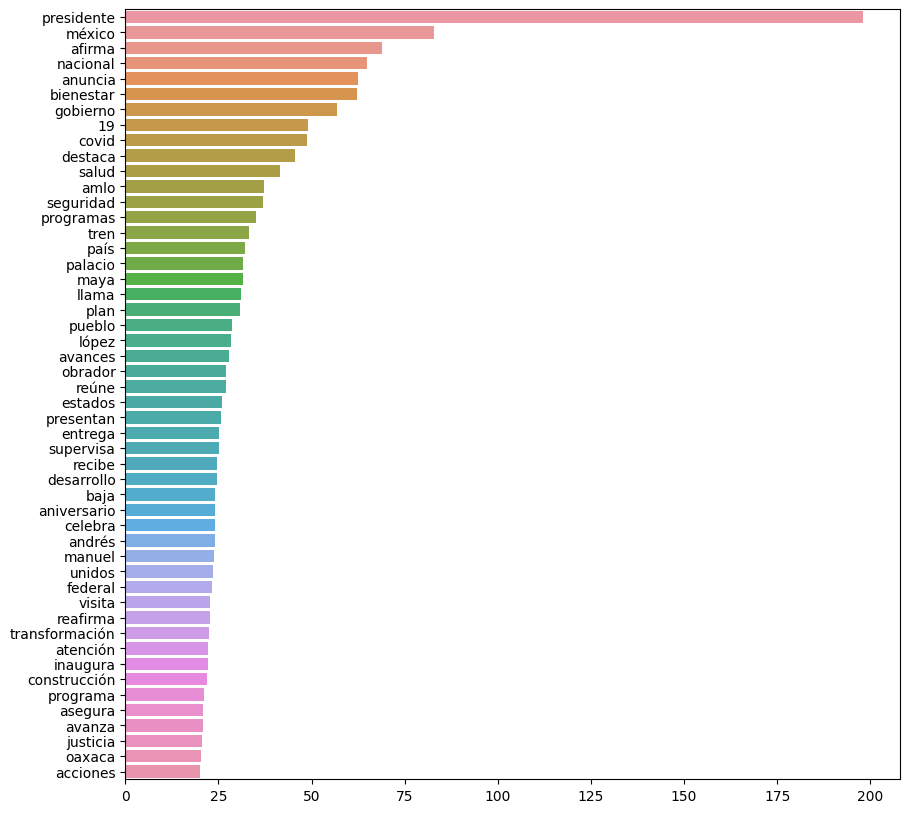

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#merge all topics
all_topics = lda.components_.sum(axis=0)

#sort them
sorted_topics = all_topics.argsort()[::-1]

#plot them
plt.figure(figsize=(10,10))
sns.barplot(x=all_topics[sorted_topics][:50], y=np.array(feature)[sorted_topics][:50])
plt.show()


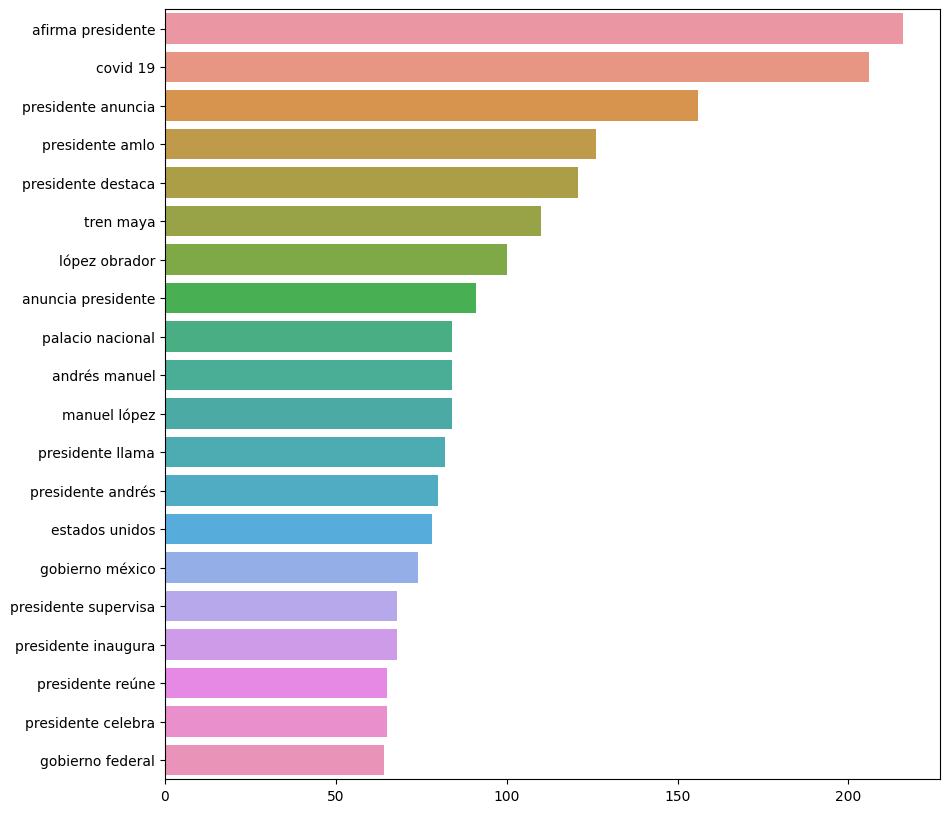

In [ ]:
def get_top_n_gram(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=None).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_n_bigrams=get_top_n_gram(df_articulos.Titulo_ns, n=20, ngram_range=(2,2))
x,y=map(list,zip(*top_n_bigrams))
plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x)
plt.show()


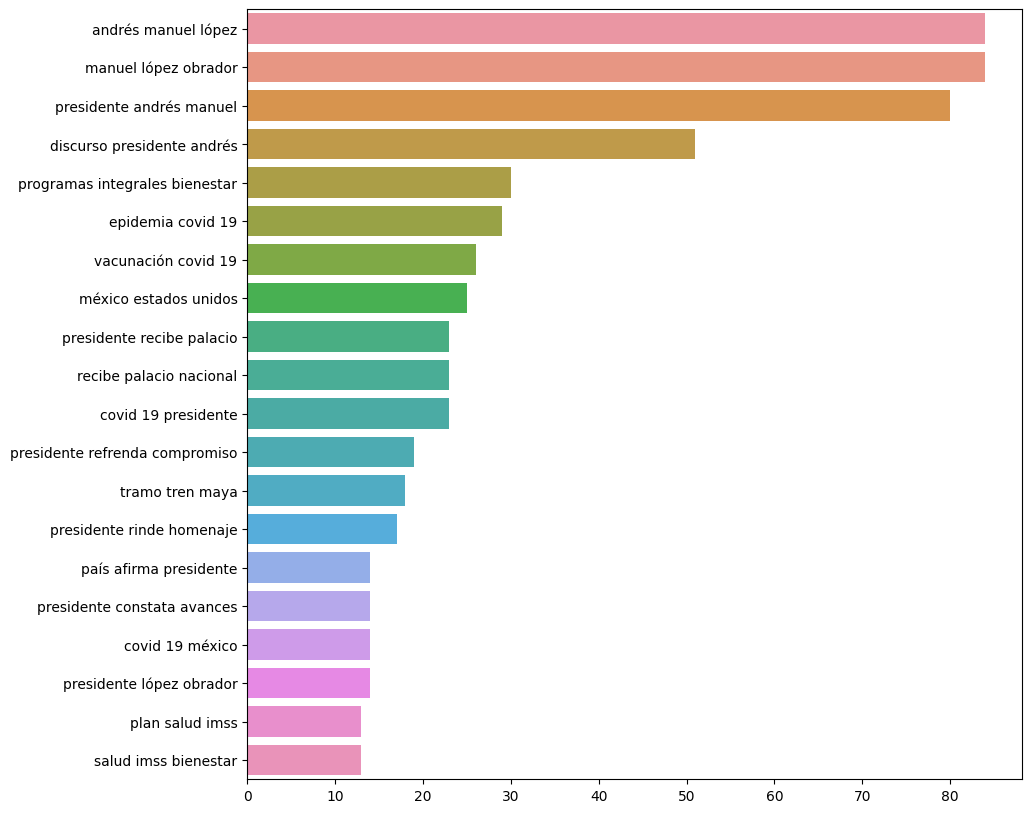

In [ ]:
top_n_trigrams=get_top_n_gram(df_articulos.Titulo_ns, n=20, ngram_range=(3,3))
x,y=map(list,zip(*top_n_trigrams))
plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x)
plt.show()


In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, tfidf_fit, tfidf, mds='tsne')
panel


/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11    -3.287418 -3.718570       1        1  4.801134
7     -4.195798 -3.234164       2        1  4.417709
16    -3.273809 -3.964801       3        1  4.126352
23    -3.452259 -3.445996       4        1  4.067476
29    -3.351099 -3.958266       5        1  3.901273
15    -3.545852 -4.137299       6        1  3.796715
22    -3.817055 -3.157901       7        1  3.748579
4     -4.292160 -3.627901       8        1  3.529276
14    -4.064357 -4.244078       9        1  3.457336
0     -3.881527 -4.110792      10        1  3.311642
26    -3.660838 -3.541642      11        1  3.276845
2     -3.551162 -3.376877      12        1  3.237576
18    -3.651487 -3.844854      13        1  3.160684
24    -3.782116 -3.610516      14        1  3.114791
25    -4.036430 -4.152129      15        1  3.095021
20    -3.661430 -3.782212      16        1  3.063495
19    -3.861865 -3.421323      17        1  2.962974
12    -3.686336 -3.684276      18        1  2.851366
21    -3.933266 -4.070973      19        1  2.836327
5     -3.764653 -3.750495      20        1  2.808288
3     -4.018301 -3.645113      21        1  2.804460
27    -3.406662 -3.784960      22        1  2.748921
6     -3.982449 -3.825438      23        1  2.637153
31    -3.682181 -3.628814      24        1  2.630659
28    -3.678204 -3.780791      25        1  2.599686
13    -3.676879 -3.615665      26        1  2.572845
9     -3.856573 -3.913884      27        1  2.517911
17    -3.712270 -3.675550      28        1  2.508505
1     -3.932667 -3.647098      29        1  2.503460
8     -3.763114 -3.742036      30        1  2.436075
30    -3.717546 -3.788924      31        1  2.354042
10    -3.765101 -3.730236      32        1  2.121426, topic_info=            Term       Freq      Total Category  logprob  loglift
23            19  38.000000  38.000000  Default  30.0000  30.0000
645        covid  38.000000  38.000000  Default  29.0000  29.0000
1718     palacio  23.000000  23.000000  Default  28.0000  28.0000
1485       lópez  21.000000  21.000000  Default  27.0000  27.0000
1520        maya  24.000000  24.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
2112       reúne   1.238199  20.571995  Topic32  -4.9901   1.0428
1748         paz   1.044589  10.879179  Topic32  -5.1601   1.5099
169         agua   0.983167  10.348810  Topic32  -5.2207   1.4992
1116  garantizar   0.935976  12.177311  Topic32  -5.2699   1.2873
526   compromiso   0.863338  15.260509  Topic32  -5.3507   0.9809

[1561 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         9  0.582369       10
2        30  0.506155      100
4         8  0.693325      106
5        32  0.520012      108
6        26  0.767840      109
...     ...       ...      ...
2502      7  0.665627  ángeles
2502     17  0.166407  ángeles
2503     18  0.479271     área
2504     22  0.722088    áreas
2507     21  0.501129  ómicron

[2717 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 8, 17, 24, 30, 16, 23, 5, 15, 1, 27, 3, 19, 25, 26, 21, 20, 13, 22, 6, 4, 28, 7, 32, 29, 14, 10, 18, 2, 9, 31, 11])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
